## PyGraphViz test


In [133]:
import pygraphviz as pgv
from IPython.display import Image, display, display_png, display_svg, SVG
import random

G = pgv.AGraph()

nodes = ['a','b','c','d','e']
G.add_nodes_from(nodes)

edges = [('a','b'),('b','c'),('b','d'),('d','e')]
for edge in edges:
    G.add_edge(edge[0],edge[1])
print(G)
G.write('simple.dot') # write to simple.dot

layouts = ["neato","dot","twopi","circo","fdp","nop"]
for layout in layouts:
    name = 'simple_'+layout+'.png'
    G.draw(name, prog = layout)
#     print name
#     display(Image(name))


strict graph "" {
	a -- b;
	b -- c;
	b -- d;
	d -- e;
}



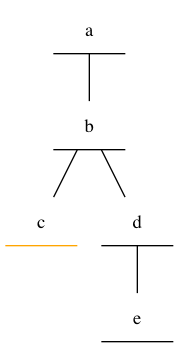

In [134]:
layout = 'dot'

G.node_attr['shape']='underline'

actual_node = G.get_node('c')

actual_node.attr['color']='orange'
# actual_node.attr['shape']='underline'
name = 'simple_'+layout+'.png'
G.draw(name, prog = layout)
display(Image('simple_dot.png'))

In [135]:
def display_graph(layout= 'dot', fformat = 'png'):
    if fformat not in ['png','svg']:
        print 'format is not real',fformat
        return
    name = 'simple_'+layout+'.'+fformat
    G.draw(name, prog = layout)
    if fformat == 'svg':
        display(SVG(name))
    else:
        display(Image(name))       

In [136]:

        
class Node:
    
    def __init__(self,name, label):
        self.name = name
        self.label = label
        self.g_node = None
        
    def __repr__(self):
        return self.name

    def update_graph(self):
        if not self.g_node:
            self.g_node = Edge.graph.get_node(self.name)
        self.g_node.attr['label'] = node.label

class Edge:
    
    graph = None
    
    def __init__(self,from_to, prob = None):
        self.from_to = from_to
        self.prob = prob
        #
        self.prob = random.random()
        self.g_edge = None
        
    def update_graph(self):
        if not self.g_edge:
            self.g_edge = Edge.graph.get_edge(*self.from_to)
        self.g_edge.attr['label'] = round(self.prob,3)
        

IndentationError: expected an indented block (<ipython-input-136-e4661c06453d>, line 7)

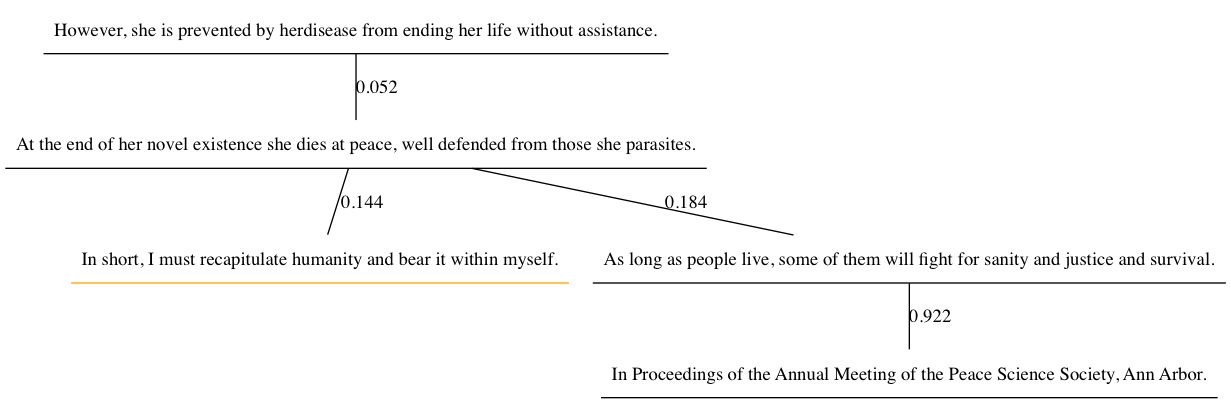

In [137]:
G = pgv.AGraph()
Edge.graph = G

# nide styles: box, underline
G.node_attr['shape']='underline'

sentences = {
  'a': 'However, she is prevented by herdisease from ending her life without assistance.',
  'b': 'At the end of her novel existence she dies at peace, well defended from those she parasites.',
  'c': 'In short, I must recapitulate humanity and bear it within myself.',
  'd': 'As long as people live, some of them will fight for sanity and justice and survival.',
  'e': 'In Proceedings of the Annual Meeting of the Peace Science Society, Ann Arbor.'
}

# convert the initial nodes(just strings into my node class)
# contains the text, which will be used as label
nnodes = [Node(node,sentences[node])for node in nodes]
G.add_nodes_from(nnodes)
for node in nnodes:
    node.update_graph()


eedges = [Edge(edge)for edge in edges]
G.add_edges_from(edges)
for edge in eedges:
    edge.update_graph()
    
actual_node = G.get_node('c')
actual_node.attr['color']='orange'

display_graph(fformat='png')